In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import pandas as pd
data = pd.read_csv('cars.csv')

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


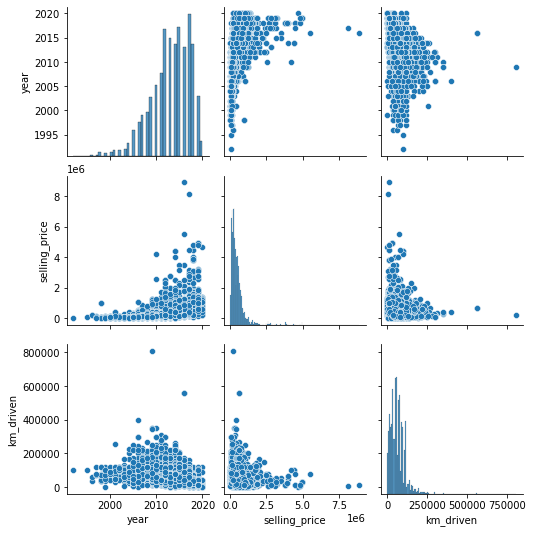

In [ ]:
import seaborn as sns
sns.pairplot(data)

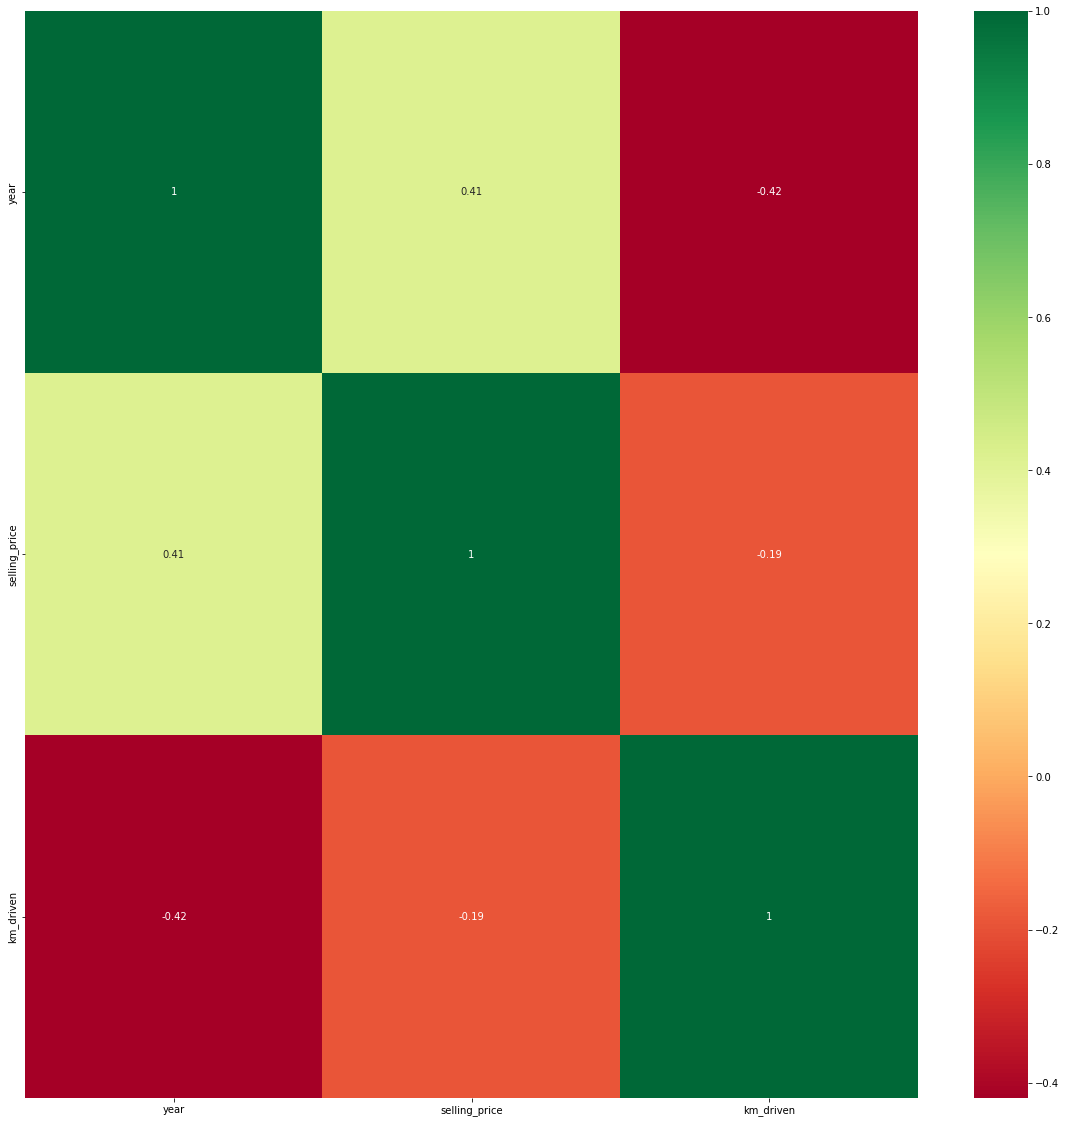

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = data.corr() #Pairwise correlation of all columns
top_corr_ft = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_ft].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data.shape

(4340, 8)

In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
print(data['fuel'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [ ]:
final = data[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [ ]:
final.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
final['Current year']=2021

In [ ]:
final['No of years'] = final['Current year'] - final['year']

In [ ]:
final.drop(['year','Current year'],axis=1,inplace=True)

In [ ]:
final.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'No of years'],
      dtype='object')

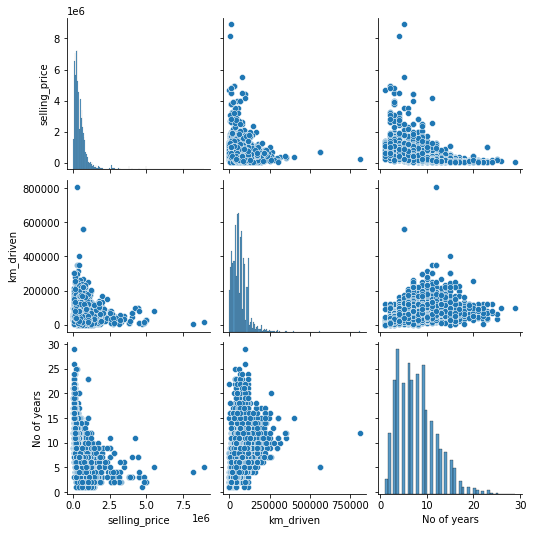

In [ ]:
sns.pairplot(final)

In [ ]:
final = pd.get_dummies( final, drop_first=True)
final.head()

,selling_price,km_driven,No of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


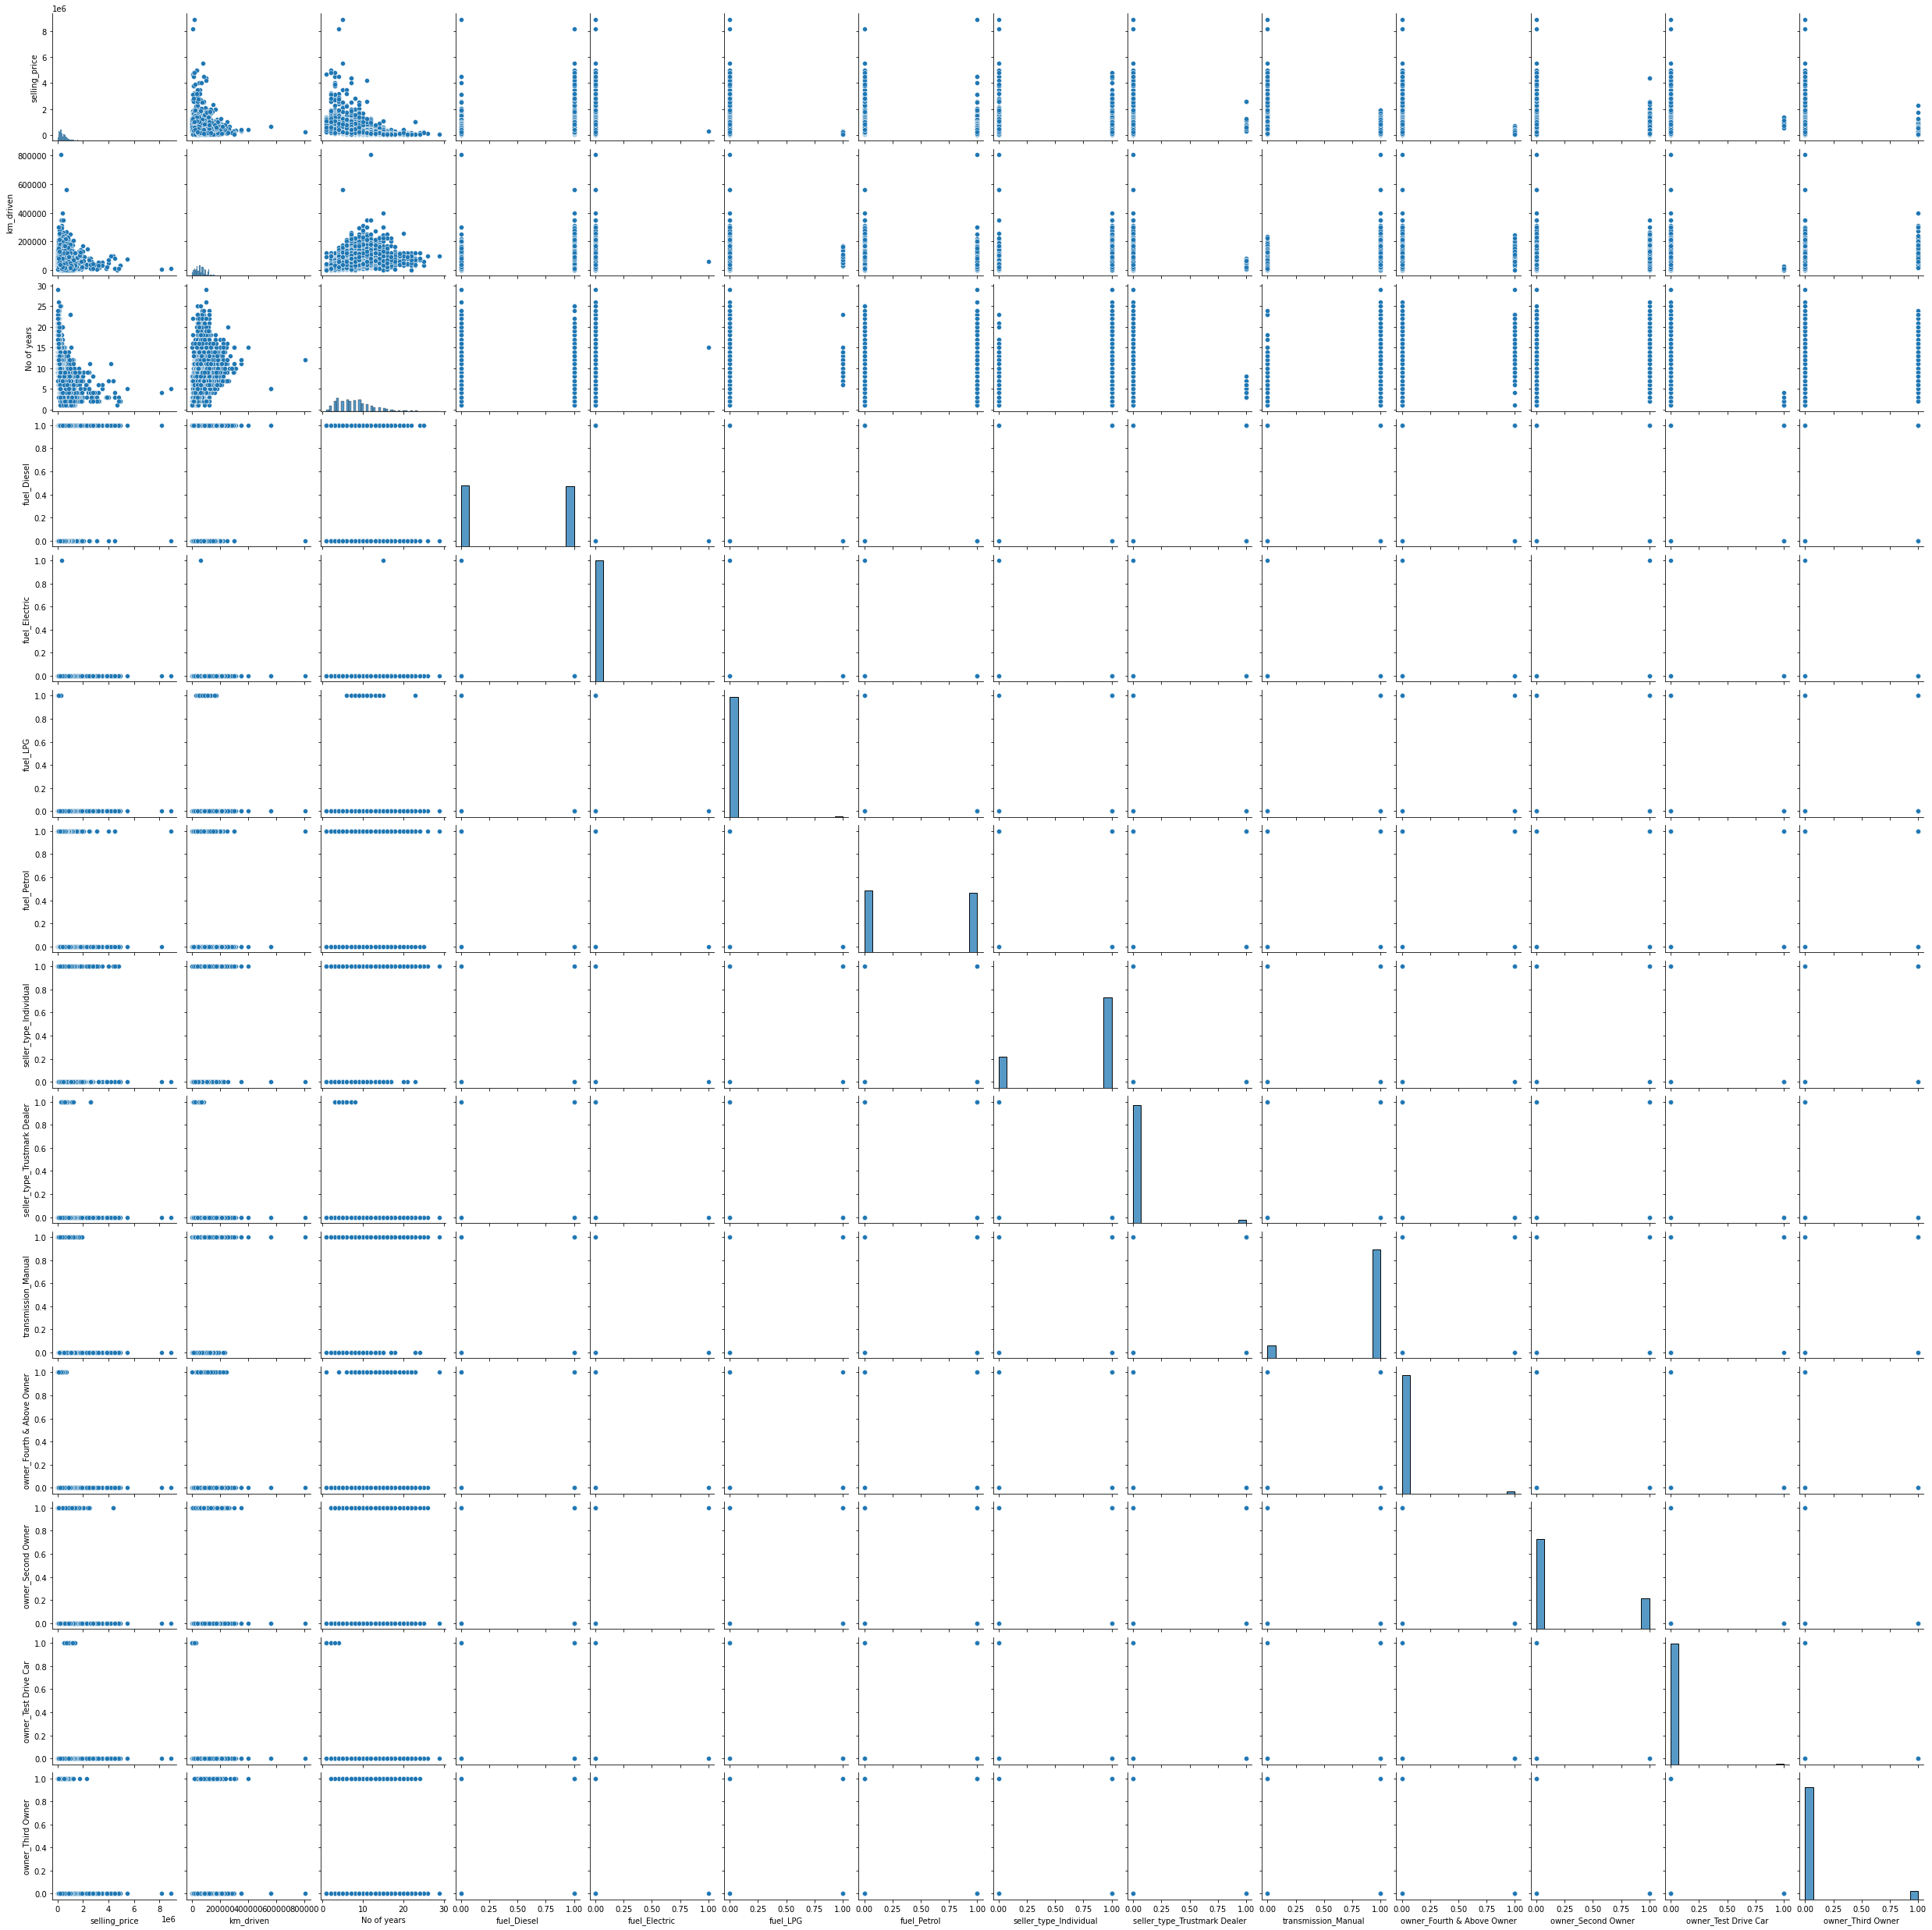

In [ ]:
sns.pairplot(final)

In [ ]:
x = final.iloc[:,1:]
y = final.iloc[:,0]

In [ ]:
final

,selling_price,km_driven,No of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,12,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,5,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
x.head()
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [ ]:
#Extra trees tell us how important a feature is in predicting a result

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_) #All the values add up to one, we can also use pie chart

[2.51804979e-01 2.43385492e-01 1.30001081e-01 4.19694594e-05
 2.52036437e-05 2.13608582e-04 4.56798404e-02 8.00217165e-03
 2.92831556e-01 8.98324653e-04 2.17173249e-02 9.74187849e-04
 4.42426137e-03]


In [ ]:
s = 0
for i in model.feature_importances_:
  s = s+i;
print(s)

1.0000000000000002


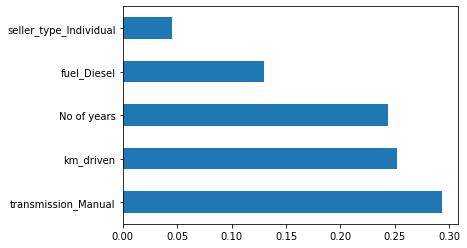

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
y_test.shape

(1302,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor()

In [ ]:
import numpy as np
n_est = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_est)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
             scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_score_

-129170261656.22229

In [ ]:
pred = rf_random.predict(x_test)

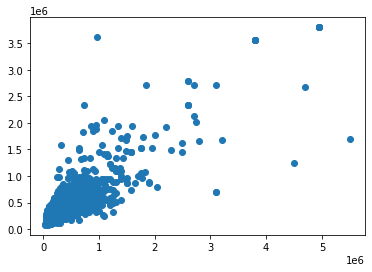

In [ ]:
plt.scatter(y_test,pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


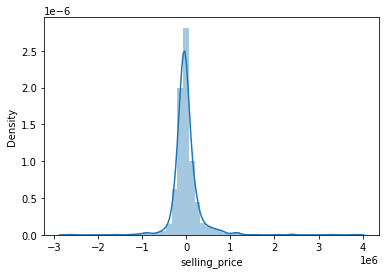

In [ ]:
sns.distplot(y_test-pred)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE: ",metrics.mean_absolute_error(y_test,pred))
print("MSE: ",metrics.mean_squared_error(y_test,pred))
print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y_test,pred)))

MAE:  171803.60804894255
MSE:  100259303636.1589
RMSE:  414.4919879188771


Pickle file can convert the whole code, all libraries and objects to a charactyer format. It can be resued anytime. It is very important to deploy apps on the web

In [ ]:
import pickle

file = open("RandomForestReg.pk1","wb")
pickle.dump(rf_random,file)